In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Data
df = pd.read_excel('decision_data.xlsx')
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df.shape

(8, 5)

In [5]:
# Preprocessing
df.drop(columns=['Days'], inplace=True)  # Drop irrelevant column
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])  # Convert all categorical data to numeric
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,1,0,0,0
1,0,0,0,1
2,0,1,1,0
3,1,0,1,1
4,0,0,1,1


In [6]:
# Split features and target
X = df.drop('Wear Jacket?', axis=1)
y = df['Wear Jacket?']

In [7]:
X

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [9]:
y

0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
Name: Wear Jacket?, dtype: int32

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (6, 3) &  Size of Y training set (6,)


In [14]:
print('Shape of X test set {}'.format(X_test.shape),'&','Size of y test set {}'.format(y_test.shape))

Shape of X test set (2, 3) & Size of y test set (2,)


In [11]:
# Model Training
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
# Prediction
y_pred = model.predict(X_test)

In [17]:
print (y_pred [0:5])

[0 0]


In [18]:
print (y_test [0:5])

1    1
5    0
Name: Wear Jacket?, dtype: int32


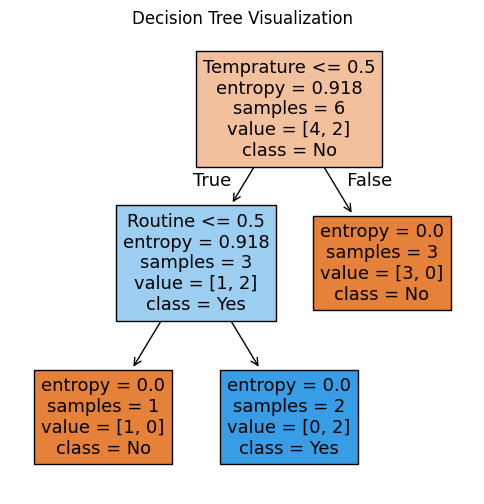

In [29]:
# Visualization of Decision Tree
plt.figure(figsize=(6, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['No', 'Yes'])

In [26]:
print(f"Accuracy Score: {acc:.2f}")

Accuracy Score: 0.50


In [27]:
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



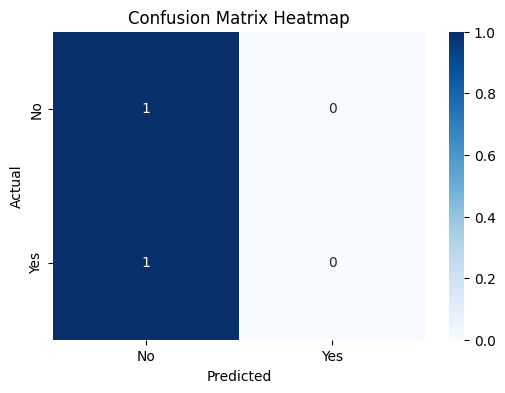

In [28]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()